# Shortest Path in Undirected
- 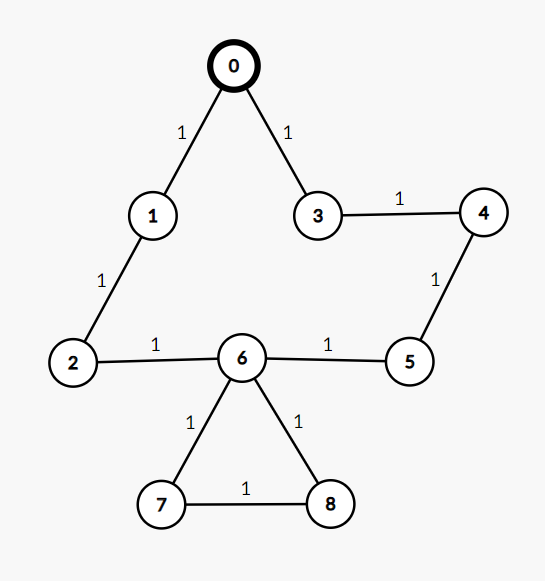

In [3]:

def shortestPath(adj, src):
    n = len(adj)
    visited = [0 for i in range(n)]
        
    shortestPath = [-1 for i in range(n)]
        
    queue = [(src, 0)]
    while len(queue) > 0:
        node, distance = queue.pop(0)
        if visited[node] == 0:
            shortestPath[node] =  distance
            visited[node] = 1
                
        for i in adj[node]:
            if visited[i] == 0:
                queue.append((i ,distance+1))
                    
    return shortestPath

adj = [[1, 3], [0, 2], [1, 6], [0, 4], [3, 5], [4, 6], [2, 5, 7, 8], [6, 8], [7, 6]]
src=0
shortestPath(adj, src)

[0, 1, 2, 1, 2, 3, 3, 4, 4]

In [5]:
def shortestPath(adj, src):
    n = len(adj)
    visited = [0 for i in range(n)]
        
    shortestPath = [10**4 for i in range(n)]
        
    queue = [(src, 0)]
    shortestPath[src] = 0
        
    while len(queue) > 0:
        node, distance = queue.pop(0)
            
        for i in adj[node]:
            if shortestPath[i] > distance+1:
                queue.append((i, distance+1))
                shortestPath[i] = distance + 1
                    
    # print(shortestPath)
        
    for i in range(n):
        if shortestPath[i] == 10**4:
            shortestPath[i] = -1
        
    return shortestPath

adj = [[1, 3], [0, 2], [1, 6], [0, 4], [3, 5], [4, 6], [2, 5, 7, 8], [6, 8], [7, 6]]
src=0
shortestPath(adj, src)

[0, 1, 2, 1, 2, 3, 3, 4, 4]

# Shortest Path in DAG
- 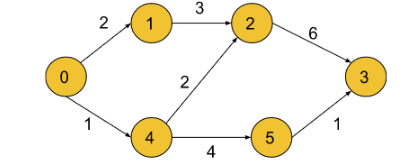

In [33]:
def shortestPath(V, E, edges):
    adj = [[] for i in range(V)]
        
    for i in range(E):
        u, v, dist = edges[i]
        adj[u].append((v, dist))
            
    print(adj)
        
    shortestDistance = [10**5 for i in range(V)]
        
    src = 0
    queue = [(src, 0)]
    shortestDistance[src] = 0
        
    while len(queue) > 0:
        node, distance = queue.pop(0)
            
        for i in adj[node]:
            n, d = i
            if shortestDistance[n] > (distance+d):
                queue.append((n, distance+d))
                shortestDistance[n] = distance+d
                    
    for i in range(V):
        if shortestDistance[i] == 10**5:
            shortestDistance[i] = -1
        
    return shortestDistance

V = 6
E= 7
edges =[[0,1,2],[0,4,1],[4,5,4],[4,2,2],[1,2,3],[2,3,6],[5,3,1]]
shortestPath(V, E, edges)

[[(1, 2), (4, 1)], [(2, 3)], [(3, 6)], [], [(5, 4), (2, 2)], [(3, 1)]]


[0, 2, 3, 6, 1, 5]

In [26]:
# Using TopoSort

def dfsTraversal(adj, node, topo, visited):
    if visited[node] == 1:
        return
        
    visited[node] = 1
        
    for i in adj[node]:
        dfsTraversal(adj, i[0], topo, visited)
            
    topo.append(node)

def shortestPath(V, E, edges):
    adj = [[] for i in range(V)]
        
    for i in range(E):
        u, v, dist = edges[i]
        adj[u].append((v, dist))
            
    # print(adj)
        
    visited = [0 for i in range(V)]
    topo = []
    for i in range(V):
        if visited[i] == 0:
            dfsTraversal(adj, i, topo, visited)
        
    print(topo)
    shortestDistance = [10**5 for i in range(V)]
    src = 0
    shortestDistance[src] = 0
        
    while len(topo) > 1:
        node = topo.pop()
            
        for i in adj[node]:
            n, d = i
            if shortestDistance[n] > shortestDistance[node] + d:
                shortestDistance[n] = shortestDistance[node]+ d
        
    for i in range(V):
        if shortestDistance[i] == 10**5:
            shortestDistance[i] = -1
        
    return shortestDistance

V = 6
E= 7
edges =[[0,1,2],[0,4,1],[4,5,4],[4,2,2],[1,2,3],[2,3,6],[5,3,1]]
shortestPath(V, E, edges)

[3, 2, 1, 5, 4, 0]


[0, 2, 3, 6, 1, 5]

# Dijkistra's Algorithm
- 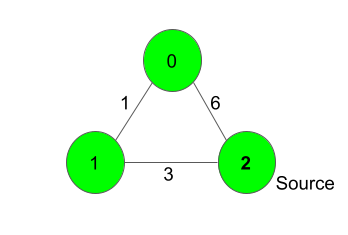

In [11]:
# Using Queues

def dijkstra(adj, src):
    V = len(adj)
    shortestPath = [10**5 for i in range(V)]
        
    queue = [(src, 0)]
    shortestPath[src] = 0
        
    while len(queue) > 0:
        u, distance = queue.pop(0)
        for i in adj[u]:
            v, weight = i
            if shortestPath[v] > shortestPath[u] + weight:
                shortestPath[v] = shortestPath[u] + weight
                queue.append((v, shortestPath[v]))
                    
                    
    return shortestPath

adj = [[[1, 1], [2, 6]], [[2, 3], [0, 1]], [[1, 3], [0, 6]]]
src = 2
dijkstra(adj, src)

[4, 3, 0]

In [17]:
# Using Priority Queue

import heapq

def dijkstra(adj, src):
        # Your code here
    V = len(adj)
        
    shortestDistance = [float('inf') for i in range(V)]
        
    pQueue = []
    heapq.heappush(pQueue, (0, src))
        
    shortestDistance[src] = 0
        
    while len(pQueue) > 0:
        distance, u = heapq.heappop(pQueue)
            
        for i in adj[u]:
            v, weight = i
            if shortestDistance[v] > shortestDistance[u] + weight:
                shortestDistance[v] = shortestDistance[u] + weight
                heapq.heappush(pQueue, (shortestDistance[v], v))
        
    return shortestDistance

adj = [[[1, 1], [2, 6]], [[2, 3], [0, 1]], [[1, 3], [0, 6]]]
src = 2
dijkstra(adj, src)

[4, 3, 0]

In [52]:
# Using Sets

def dijkstra(adj, src):
    # Your code here
    V = len(adj)
        
    shortestDistance = [float('inf') for i in range(V)]
        
    set = {(0, src)}
    shortestDistance[src] = 0
        
    while len(set) > 0:
        distance, u = set.pop()
            
        for i in adj[u]:
            v, weight = i
            if shortestDistance[v] > shortestDistance[u] + weight:
                shortestDistance[v] = shortestDistance[u] + weight
                set.add((shortestDistance[v], v))
                    
    return shortestDistance

adj = [[[1, 1], [2, 6]], [[2, 3], [0, 1]], [[1, 3], [0, 6]]]
src = 2
dijkstra(adj, src)

[4, 3, 0]

# Shortest path in a binary maze
- 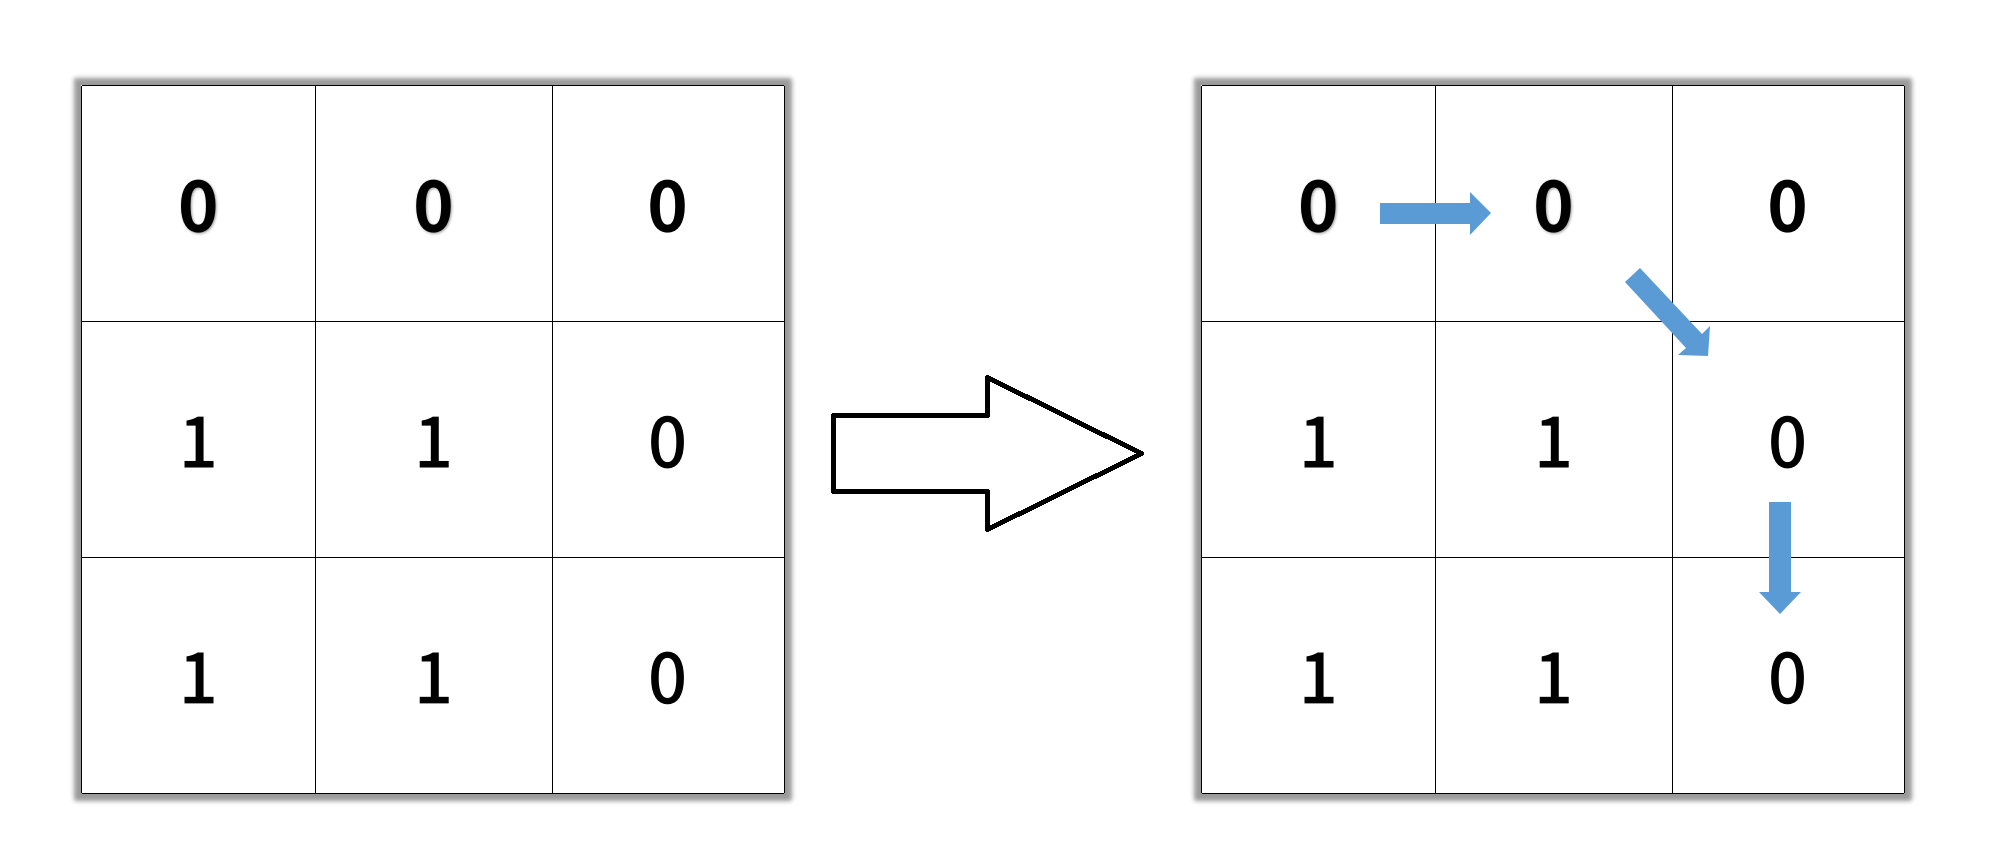

In [1]:
def shortestPathBinaryMatrix(grid):
        

    n = len(grid)

    if grid[0][0] == 1 or grid[n-1][n-1] == 1:
        return -1


    shortestPath = [[float('inf') for j in range(n)] for i in range(n)]
    dirRow = [-1, -1, -1, 0, 1, 1, 1, 0, -1]
    dirCol = [-1, 0, 1, 1, 1, 0, -1, -1, -1]

    queue = [(0, 0)]
    shortestPath[0][0] = 1

    while len(queue):
        row, col = queue.pop(0)
        if row == n-1 and col == n-1:
            return shortestPath[row][col] 
        for i in range(8):
            r = row + dirRow[i]
            c = col + dirCol[i]

            if 0 <= r < n and 0 <= c < n and grid[r][c] == 0 and shortestPath[r][c] > shortestPath[row][col] + 1:
                queue.append((r, c))
                shortestPath[r][c] = shortestPath[row][col] + 1
             
    return -1
grid = [[0,0,0],[1,1,0],[1,1,0]]
shortestPathBinaryMatrix(grid)

4

In [59]:
def shortestPathBinaryMatrix(grid):
    
    n = len(grid)

    if grid[0][0] == 1 or grid[n-1][n-1] == 1:
        return -1

    delRow = [-1, -1, -1, 0, 1, 1, 1, 0, -1]
    delCol = [-1, 0, 1, 1, 1, 0, -1, -1, -1]

    queue = [(1, 0, 0)]
    grid[0][0] = 1

    while len(queue):
        distance, row, col = queue.pop(0)
        if row == n-1 and col == n-1:
            return distance 
        for i in range(8):
            r = row + delRow[i]
            c = col + delCol[i]

            if 0 <= r < n and 0 <= c < n and grid[r][c] == 0:
                queue.append((distance+1, r, c))
                grid[r][c] = 1
                    
    return -1

grid = [[0,0,0],[1,1,0],[1,1,0]]
shortestPathBinaryMatrix(grid)

4

# Path with minimum effort
- 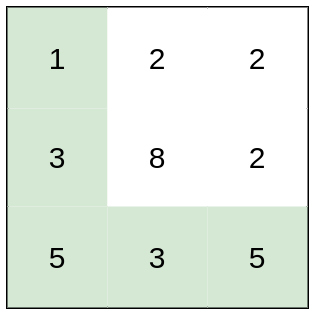
-  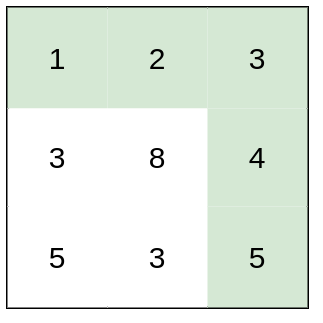

In [9]:

import heapq
def minimumEffortPath(heights):
    n = len(heights)
    m = len(heights[0])

    dirX = [-1, 0, 1, 0]
    dirY = [0, 1, 0, -1]

    shortestDistance = [[float('inf') for j in range(m)] for i in range(n)]

    pQueue = []
    heapq.heappush(pQueue, (0, 0, 0))
    shortestDistance[0][0] = 0

    while len(pQueue):
        effort, ux, uy = heapq.heappop(pQueue)

        for i in range(4):
            vx = ux + dirX[i]
            vy = uy + dirY[i]
            if 0 <= vx < n and 0 <= vy < m :
                newEffort = max(effort, abs(heights[vx][vy]-heights[ux][uy]))
                if shortestDistance[vx][vy] > newEffort:
                    shortestDistance[vx][vy] = newEffort
                    heapq.heappush(pQueue, (shortestDistance[vx][vy], vx, vy))


    return shortestDistance[n-1][m-1]

heights = [[1,2,2],[3,8,2],[5,3,5]]
minimumEffortPath(heights)

2

# Cheapest Flights Within K Stops
- 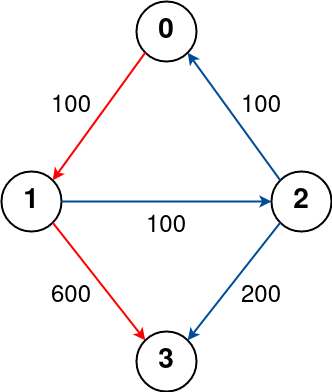

In [7]:
# Better Approach

def findCheapestPrice(n, flights, src, dst, k):
    adj = [[] for i in range(n)]

    for u, v, dist in flights:
        adj[u].append((v, dist))
        
    shortestDistance  = [float('inf') for i in range(n)]

    set = {(0, src, -1)}
    shortestDistance[src] = 0

    while len(set) > 0:
        distance, u, stops = set.pop()
            
        for i in adj[u]:
            v, d = i
            if stops < k:
                if shortestDistance[v] > distance+d:
                    shortestDistance[v] = distance+d
            
                set.add((distance+d, v, stops+1))

    if shortestDistance[dst] != float('inf'):
        return shortestDistance[dst]
    return -1

n = 4
flights = [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]]
src = 0
dst = 3
k = 1
findCheapestPrice(n ,flights, src, dst, k)

700

In [9]:
# Optimal Approach

def findCheapestPrice(n, flights, src, dst, k):
    adj = [[] for i in range(n)]

    for u, v, dist in flights:
        adj[u].append((v, dist))
        
    shortestDistance  = [float('inf') for i in range(n)]
        
    queue = [(-1, src, 0)]
    shortestDistance[src] = 0

    while len(queue) > 0:
        stops, u, distance = queue.pop(0)

        for i in adj[u]:
            v, d = i
            if stops < k and shortestDistance[v] > distance + d:
                shortestDistance[v] = distance + d
                queue.append((stops+1, v, shortestDistance[v])) 

    if shortestDistance[dst] != float('inf') :
        return shortestDistance[dst] 
    return -1

n = 4
flights = [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]]
src = 0
dst = 3
k = 1
findCheapestPrice(n ,flights, src, dst, k)

700

# Network Delay time
- 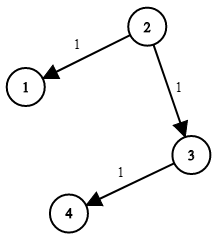

In [21]:
# Using Set

def networkDelayTime(times, n, k):
        
    adj = [[] for i in range(n+1)]

    for i in times:
        u, v, time = i
        adj[u].append((v, time))

    print(adj)

    shortestDistance = [float('inf') for i in range(n+1)]
    shortestDistance[0] = 0

    set = {(0, k)}
    shortestDistance[k] = 0

    while len(set) > 0:
        time, u = set.pop()
        for i in adj[u]:
            v, t = i 
            if shortestDistance[v] > shortestDistance[u] + t:
                shortestDistance[v] = shortestDistance[u] + t
                set.add((shortestDistance[v], v))


    if max(shortestDistance) != float('inf') :
        return max(shortestDistance) 
        
    return -1

times = [[2,1,1],[2,3,1],[3,4,1]]
n = 4
k = 2
networkDelayTime(times, n, k)

[[], [], [(1, 1), (3, 1)], [(4, 1)], []]


2

In [31]:
# Using Priority Heap

import heapq
def networkDelayTime(times, n, k):
        
    adj = [[] for i in range(n+1)]

    for i in times:
        u, v, time = i
        adj[u].append((v, time))

    print(adj)

    shortestDistance = [float('inf') for i in range(n+1)]
    shortestDistance[0] = 0

    pQueue = []
    heapq.heappush(pQueue, (0, k))
    shortestDistance[k] = 0


    while len(pQueue) > 0:
        time, u = heapq.heappop(pQueue)
        for i in adj[u]:
            v, t = i 
            if shortestDistance[v] > shortestDistance[u] + t:
                shortestDistance[v] = shortestDistance[u] + t
                heapq.heappush(pQueue, (shortestDistance[v], v))


    if max(shortestDistance) != float('inf') :
        return max(shortestDistance) 
        
    return -1

times = [[2,1,1],[2,3,1],[3,4,1]]
n = 4
k = 2
networkDelayTime(times, n, k)

[[], [], [(1, 1), (3, 1)], [(4, 1)], []]


2

# Number of Ways to Arrive at Destination
- 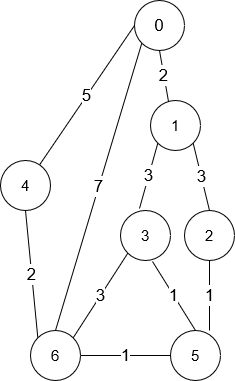

In [14]:
# Time Complexity : O(V + ELogV)

import heapq

def countPaths(n, roads):
          
    adj = [[] for i in range(n)]

    for i in roads:
        u,v, distance = i
        adj[u].append((v, distance))
        adj[v].append((u, distance))
    # print(adj)
    
    shortestDistance = [float('inf') for i in range(n)]
    ways = [-1 for i in range(n)] 

    pQueue = []
    heapq.heappush(pQueue, (0, 0))

    shortestDistance[0] = 0
    ways[0] = 1

    while len(pQueue) > 0:
        distance, u = heapq.heappop(pQueue)
            
        for i in adj[u]:
            v, d = i
            
            if shortestDistance[v] > distance + d:
                heapq.heappush(pQueue, (distance +d, v))
                shortestDistance[v] = distance + d
                ways[v] = ways[u]
            elif shortestDistance[v] == distance + d:
                ways[v] += ways[u]
                    
    return ways[n-1]
    
n = 7
roads = [[0,6,7],[0,1,2],[1,2,3],[1,3,3],[6,3,3],[3,5,1],[6,5,1],[2,5,1],[0,4,5],[4,6,2]]
countPaths(n, roads)

4

3